In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Read The CSV
prima_data = pd.read_csv('data/pima-indians-diabetes.csv', )

prima_data.columns = ['Times pregnant',
                        'Plasma glucose concentration',
                        'Diastolic blood pressure',
                                 'Triceps skinfold thickness',
                                 '2-Hour serum insulin',
                                 'BMI',
                                 'Diabetes pedigree function',
                                 'Age',
                                 'Class']

prima_data.head()

,Times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [29]:
# Info
prima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Times pregnant                767 non-null    int64  
 1   Plasma glucose concentration  767 non-null    int64  
 2   Diastolic blood pressure      767 non-null    int64  
 3   Triceps skinfold thickness    767 non-null    int64  
 4   2-Hour serum insulin          767 non-null    int64  
 5   BMI                           767 non-null    float64
 6   Diabetes pedigree function    767 non-null    float64
 7   Age                           767 non-null    int64  
 8   Class                         767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
# Describe
prima_data.describe()

,Times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizations

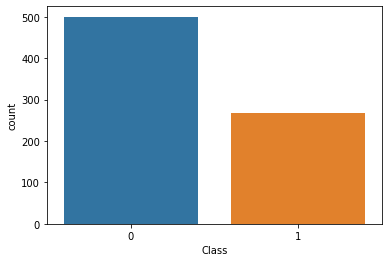

In [81]:
# Let's visualize the class
sns.countplot(x='Class', data=prima_data)

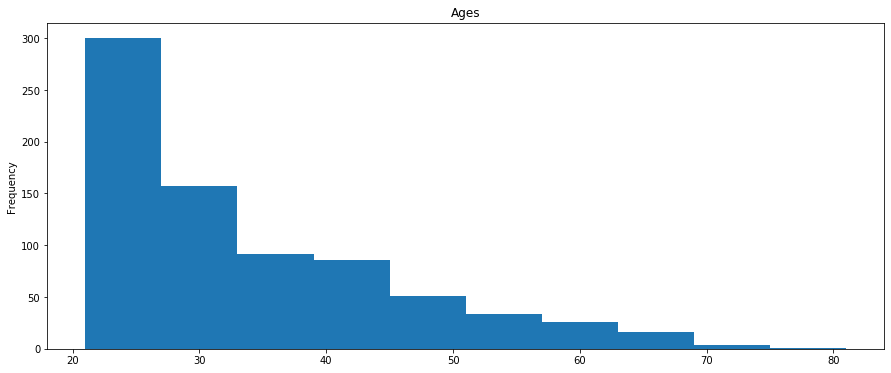

In [104]:
# Let's visualize the ages
prima_data['Age'].plot.hist(title='Ages', figsize=(15, 6))

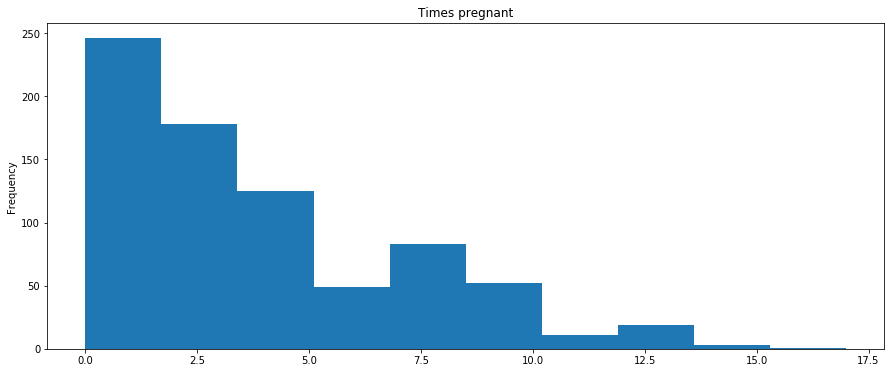

In [85]:
# Let's visualize the times pragnent
prima_data['Times pregnant'].plot.hist(title='Times pregnant', figsize=(15, 6))

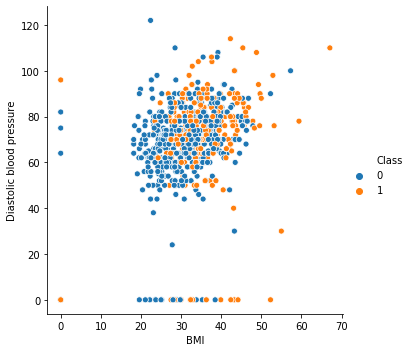

In [101]:
# Let's visualize BMI vs Blood Presure
sns.relplot(y='Diastolic blood pressure', x='BMI', hue='Class', data=prima_data)

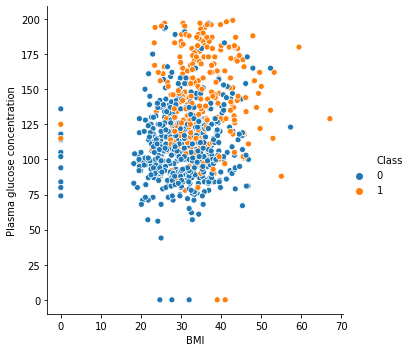

In [102]:
# Let's visualize BMI vs Blood Presure
sns.relplot(y='Plasma glucose concentration', x='BMI', hue='Class', data=prima_data)